In [1]:
## dataimggen go deeper
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img, img_to_array

In [52]:
gen = ImageDataGenerator(
    ## 20도 이내 회전
    rotation_range=20,
    ## 가로 방향 30퍼센트 범위내에서 이동
    width_shift_range=0.3,
    ## 기울임 40프로 이내
    shear_range=0.4,
    # 좌우반전
    horizontal_flip=True,
    rescale = 1./255
)

In [4]:
cd /content/drive/MyDrive/Colab Notebooks/

/content/drive/MyDrive/Colab Notebooks


In [53]:

## class_mode = binary(2진) / categorical(one-hot) / sparse(10진수)
train = gen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/train/', target_size =(100,100), batch_size=5, seed=42, class_mode='binary' , shuffle=True)


Found 202 images belonging to 2 classes.


In [15]:
import os 
## 특정 경로에 있는 데이터를 모두 가져와 img_list에 추가
img_list=[f"train/dog/{i}" for i in os.listdir('train/dog')]

In [18]:
img_arr=[]
for i in range(len(img_list[:5])):
  ## 사이즈 지정
  loaded_img= load_img(img_list[:5][i],target_size=(100,100))
  ## 정규화
  loaded_img_array = img_to_array(loaded_img)/ 255.0
  ## 다시 리스트에 담기
  img_arr.append(loaded_img_array)

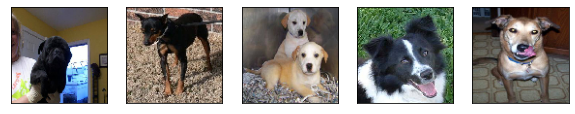

In [29]:
## 원본 이미지 확인
plt.figure(figsize=(10,10))
for i in range(len(img_arr)):
  plt.subplot(1,len(img_arr), i+1)
  plt.xticks([]); plt.yticks([])
  plt.imshow(img_arr[i])

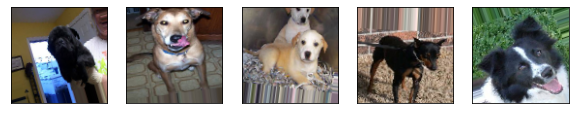

In [46]:
##  np.array로 감싸 4차원 tensor로 변경
datagen = gen.flow(np.array(img_arr), batch_size=5)
## 배치 사이즈 갯수만큼 이미지 생성
## datagen을 거친 변형된 이미지 확인
img = datagen.next()
plt.figure(figsize=(10,10))
for i in range(len(img)):

  plt.subplot(1,len(img), i+1)
  plt.xticks([]); plt.yticks([])
  plt.imshow(img[i])

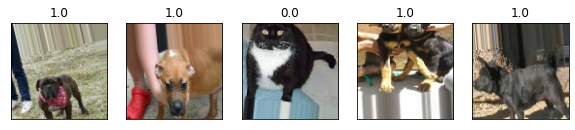

In [69]:
img, label = train.next()
plt.figure(figsize=(10,10))
for i in range(len(img)):
  ## subplot(rows, cols, index)
  
  plt.subplot(1,len(img), i+1)
  plt.title(str(label[i]))
  plt.xticks([]); plt.yticks([])
  
  plt.imshow(img[i])

In [60]:
np.argmax(label)

0

In [61]:
label

array([1., 0., 1., 0., 0.], dtype=float32)